# Palleja & Suez species baseline random forest
## Using vegdist (Bray-Curtis). Both studies from NGless result and rarefied to 190!

## 1. Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/Users/Jessica/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
species = pd.read_csv('/Users/Jessica/Documents/Lab/Multiple_longitudinal/Microbe_resilience/Palleja_Suez_both_ngless_rarefy190_species_baseline_vegdist_bray_forML.txt',
                   delimiter = "\t")

In [3]:
species.head()

,Study,ID,Dist_V1V2,Shannon,Timepoint,Run,Acetobacter.sp.._Acetobacter.sp..CAG.267_Acetobacter.sp..46_36_,Acidiphilium.sp..CAG.727,Acinetobacter.sp.._Acinetobacter.sp..CAG.196_Acinetobacter.sp..CAG.196_36_41_Candidatus.Gastranaerophilales.bacterium.HUM_22_Candidatus.Gastranaerophilales.bacterium.HUM_11_Candidatus.Gastranaerophilales.bacterium.HUM_3_Candidatus.Gastranaerophilales.bacterium.HUM_4_Candidatus.Gastranaerophilales.bacterium.HUM_17_Candidatus.Gastranaerophilales.bacterium.HUM_13_Candidatus.Gastranaerophilales.bacterium.HUM_23_Candidatus.Gastranaerophilales.bacterium.HUM_16_Candidatus.Gastranaerophilales.bacterium.HUM_15_Candidatus.Gastranaerophilales.bacterium.HUM_10_Candidatus.Gastranaerophilales.bacterium.HUM_18_Candidatus.Gastranaerophilales.bacterium.HUM_5_,Acinetobacter.sp.._Proteobacteria.bacterium.CAG.139_Acinetobacter.sp..N54.MGS.139_,...,X_Eubacterium_.eligens._Eubacterium.eligens.CAG.72_Candidatus.Gastranaerophilales.bacterium.HUM_19__Eubacterium_.eligens_,X_Eubacterium_.hallii._Eubacterium.hallii.CAG.12_uncultured.Eubacterium.sp.__Eubacterium_.hallii_,X_Eubacterium_.rectale._Eubacterium.rectale.CAG.36_Eubacterium.sp..41_20__Eubacterium_.rectale_,X_Eubacterium_.siraeum._Eubacterium.siraeum.CAG.80__Eubacterium_.siraeum_,X_Ruminococcus_.gnavus.__Ruminococcus_.gnavus.CAG.126_Clostridia.bacterium.UC5.1.2D9__Ruminococcus_.gnavus_Lachnospiraceae.bacterium.2_1_58FAA_,X_Ruminococcus_.torques,bacterium.LF.3._Coprobacillus.sp..CAG.235_bacterium.LF.3_Coprobacillus.sp..CAG.235_29_27_uncultured.Clostridium.sp._,uncultured.Blautia.sp.,uncultured.Clostridium.sp.,uncultured.Eubacterium.sp.
0,Suez,603,0.679758,3.502405,Baseline,ERR2749744,0,0,0,0,...,3,0,0,0,0,0,2,0,2,1
1,Suez,604,0.792593,2.753017,Baseline,ERR2749783,0,0,0,0,...,0,0,2,0,1,1,0,0,0,0
2,Suez,605,0.937695,2.861775,Baseline,ERR2749816,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
3,Suez,606,0.988981,3.177927,Baseline,ERR2749856,0,0,0,0,...,2,2,0,0,0,2,2,0,0,0
4,Suez,704,1.000000,2.795313,Baseline,ERR2750073,0,0,0,0,...,0,0,1,0,0,4,0,1,0,0


### Separate the data into meta variables and microbe variables

In [5]:
microbe = species.iloc[:, 6:len(species.columns)]

In [6]:
microbe.head()

,Acetobacter.sp.._Acetobacter.sp..CAG.267_Acetobacter.sp..46_36_,Acidiphilium.sp..CAG.727,Acinetobacter.sp.._Acinetobacter.sp..CAG.196_Acinetobacter.sp..CAG.196_36_41_Candidatus.Gastranaerophilales.bacterium.HUM_22_Candidatus.Gastranaerophilales.bacterium.HUM_11_Candidatus.Gastranaerophilales.bacterium.HUM_3_Candidatus.Gastranaerophilales.bacterium.HUM_4_Candidatus.Gastranaerophilales.bacterium.HUM_17_Candidatus.Gastranaerophilales.bacterium.HUM_13_Candidatus.Gastranaerophilales.bacterium.HUM_23_Candidatus.Gastranaerophilales.bacterium.HUM_16_Candidatus.Gastranaerophilales.bacterium.HUM_15_Candidatus.Gastranaerophilales.bacterium.HUM_10_Candidatus.Gastranaerophilales.bacterium.HUM_18_Candidatus.Gastranaerophilales.bacterium.HUM_5_,Acinetobacter.sp.._Proteobacteria.bacterium.CAG.139_Acinetobacter.sp..N54.MGS.139_,Acinetobacter.species.incertae.sedis,Adlercreutzia.equolifaciens,Akkermansia.muciniphila._Akkermansia.muciniphila.CAG.154_Akkermansia.sp..UNK.MGS.1_Akkermansia.sp..54_46_Akkermansia.sp..Phil8_Akkermansia.muciniphila_,Akkermansia.sp.._Akkermansia.sp..KLE1605_Akkermansia.sp..KLE1797_Akkermansia.sp..KLE1798_,Alistipes.finegoldii._Alistipes.finegoldii.CAG.68_Alistipes.finegoldii_Alistipes.sp..HGB5_,Alistipes.finegoldii_onderdonkii._Alistipes.sp..CAG.29_Alistipes.sp..AL.1_Alistipes.finegoldii_Alistipes.onderdonkii_,...,X_Eubacterium_.eligens._Eubacterium.eligens.CAG.72_Candidatus.Gastranaerophilales.bacterium.HUM_19__Eubacterium_.eligens_,X_Eubacterium_.hallii._Eubacterium.hallii.CAG.12_uncultured.Eubacterium.sp.__Eubacterium_.hallii_,X_Eubacterium_.rectale._Eubacterium.rectale.CAG.36_Eubacterium.sp..41_20__Eubacterium_.rectale_,X_Eubacterium_.siraeum._Eubacterium.siraeum.CAG.80__Eubacterium_.siraeum_,X_Ruminococcus_.gnavus.__Ruminococcus_.gnavus.CAG.126_Clostridia.bacterium.UC5.1.2D9__Ruminococcus_.gnavus_Lachnospiraceae.bacterium.2_1_58FAA_,X_Ruminococcus_.torques,bacterium.LF.3._Coprobacillus.sp..CAG.235_bacterium.LF.3_Coprobacillus.sp..CAG.235_29_27_uncultured.Clostridium.sp._,uncultured.Blautia.sp.,uncultured.Clostridium.sp.,uncultured.Eubacterium.sp.
0,0,0,0,0,0,0,5,0,0,0,...,3,0,0,0,0,0,2,0,2,1
1,0,0,0,0,0,0,0,0,0,0,...,0,0,2,0,1,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,2,2,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,4,0,1,0,0


### Variance Test: to exclude meaningless features

In [7]:
# Calculate variances
all_var = microbe.var()
all_var_val = all_var.values.tolist() #Extract only the variances to a list

Text(0.5, 0, 'All variance')

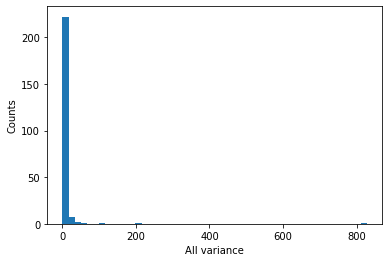

In [8]:
# Plot all variace
plt.hist(all_var_val, density=False, bins=50)  # density=False would make counts
plt.ylabel('Counts')
#plt.xlim([0, 1])
plt.xlabel('All variance')

In [9]:
# The largest variance is only 0.031, so the variance threshold =1 doesn't apply 
all_var.max() 

827.8986928104575

In [10]:
# Define filter_by_variance function
#from sklearn.feature_selection import VarianceThreshold

#def filter_by_variance(data, var_thr):
#    constant_filter = VarianceThreshold(threshold=var_thr)
#   constant_filter.fit(data)
#    features_to_keep = data.columns[constant_filter.get_support()]
#    return features_to_keep

### Correlation test: To figure out if we need models that can deal with correlated data (Elastic net) or if it suffices to take a model that uses one-by-one feature selection (Lasso)


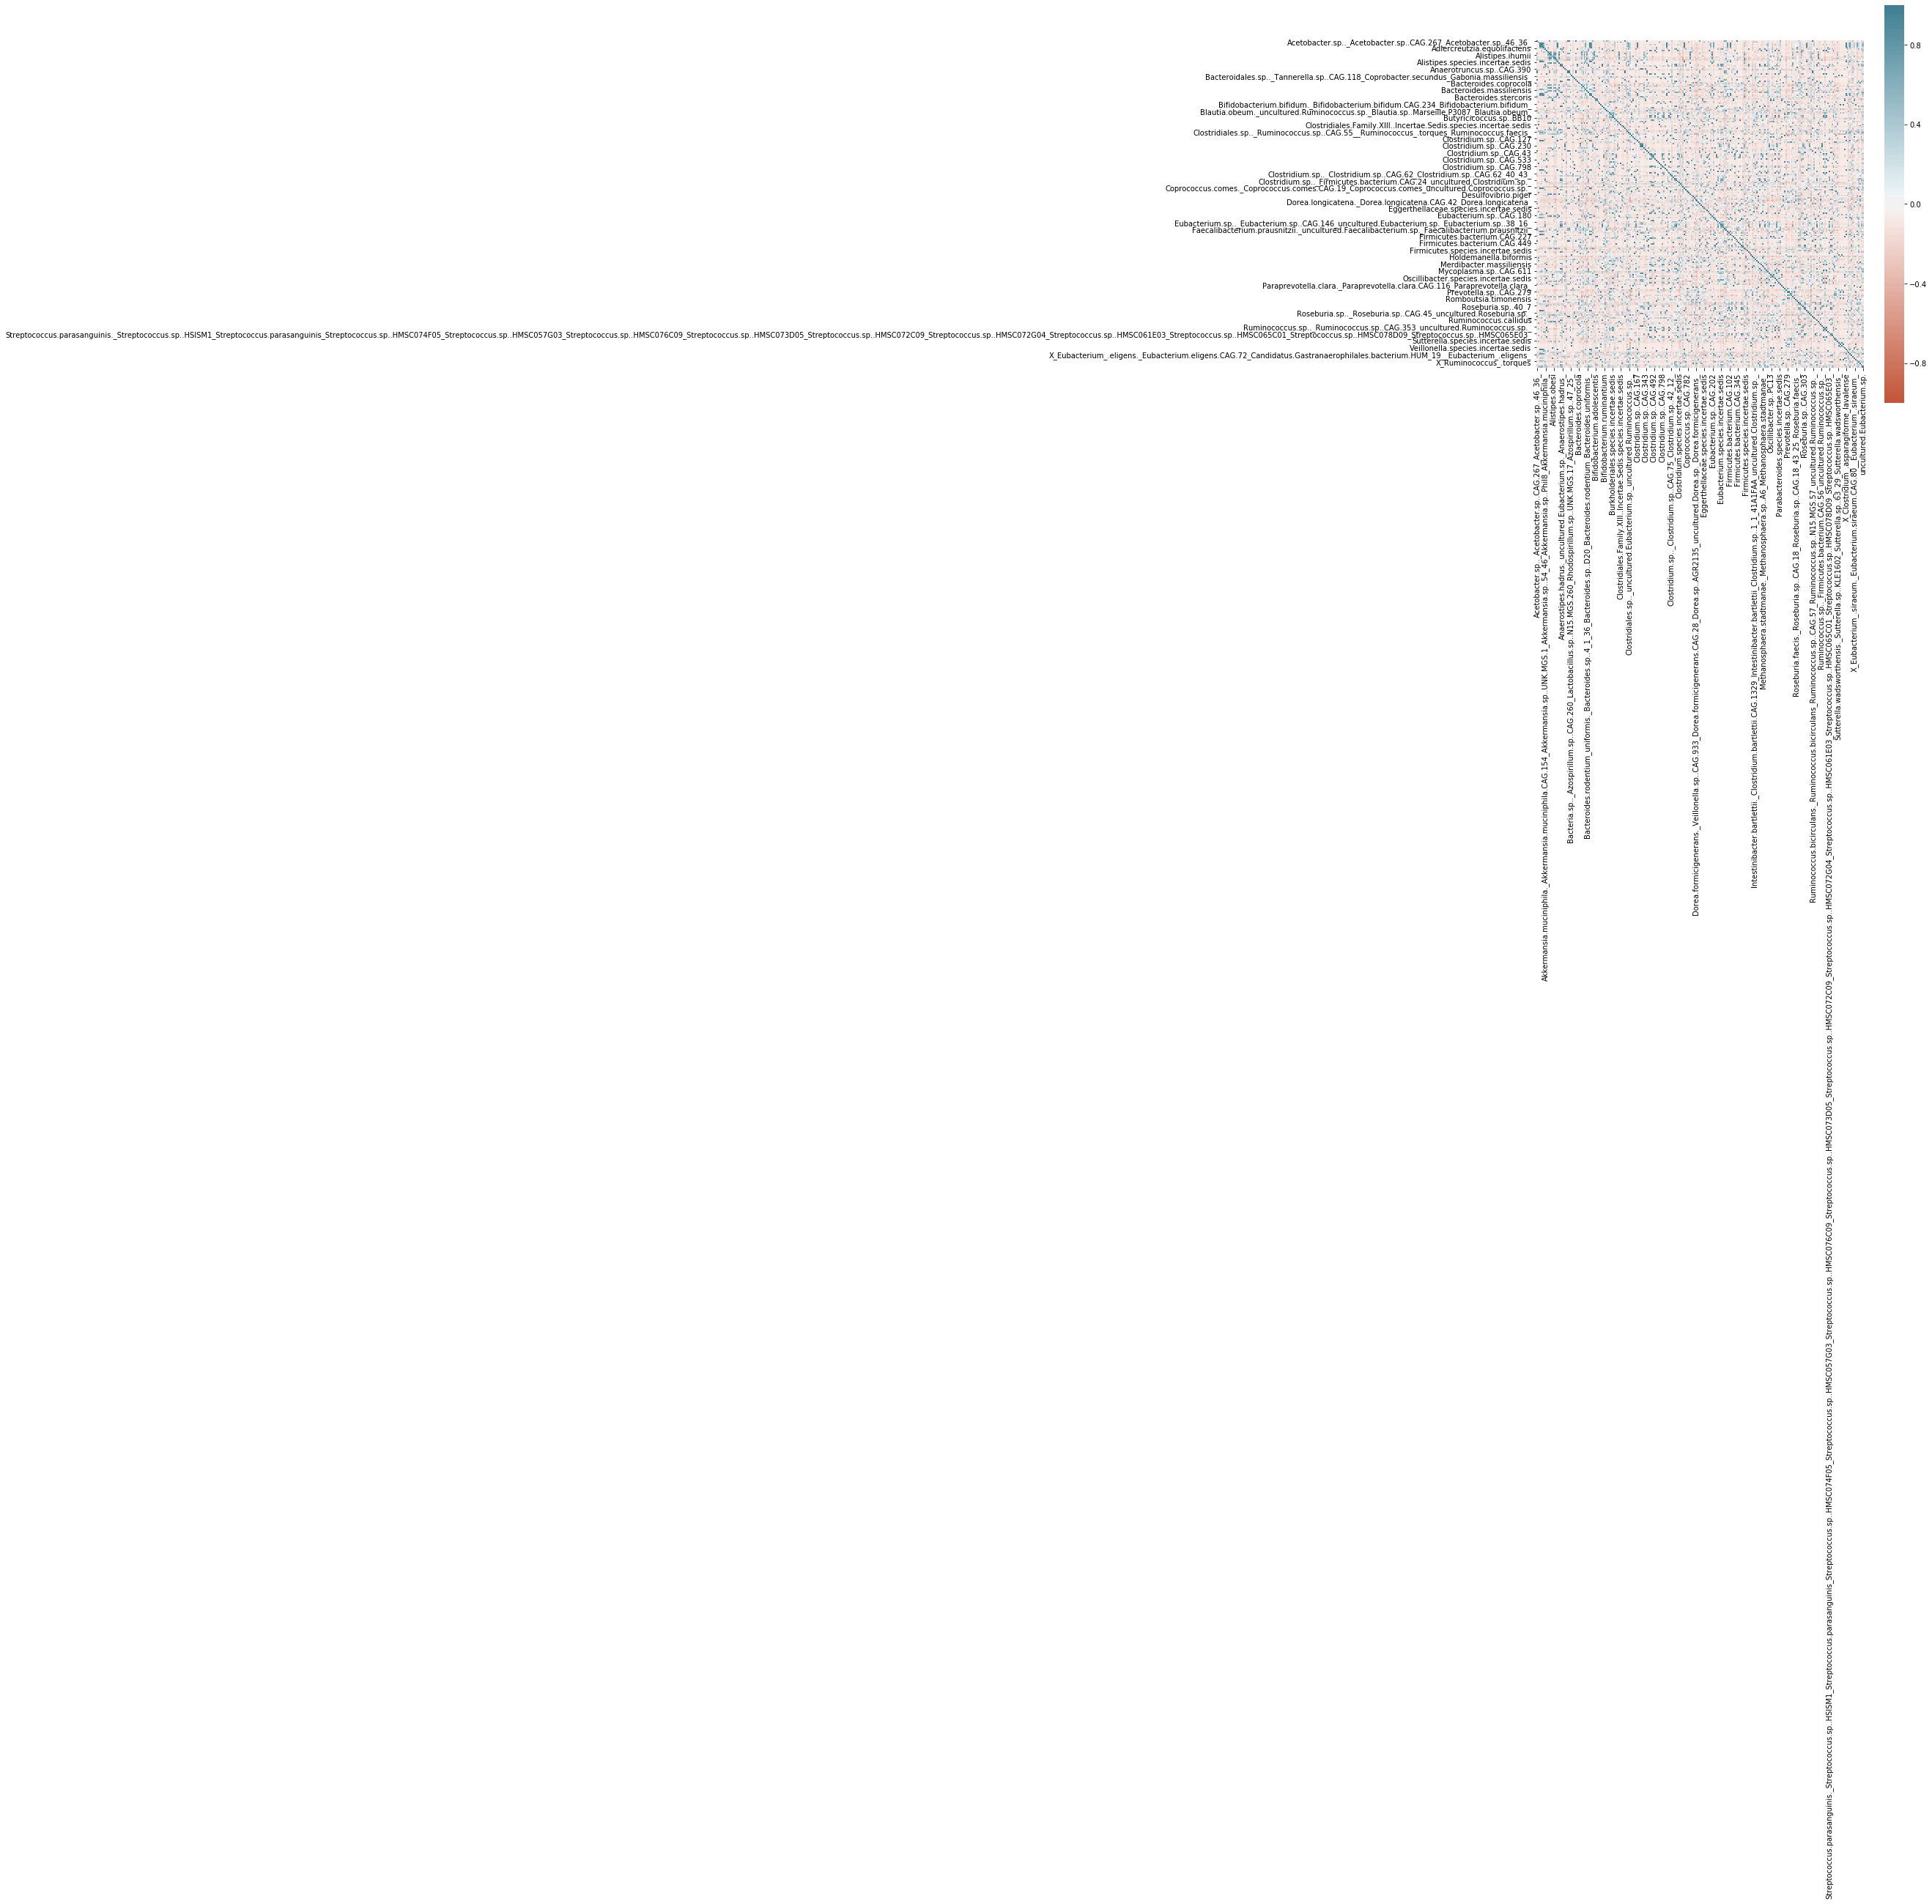

In [11]:
plt.rcParams['figure.figsize'] = [10, 10]
sns.heatmap(microbe.corr(), vmin=-1, vmax=1, center=0, 
            cmap=sns.diverging_palette(20, 220, n=200),square=True)

From the correlation test above, there’s no really high correlation between features, so elastic net isn’t required, I can use Lasso instead.

### Feature Importance test (skipped)

## 2. Set up evaluation environment. Use stratified 5-fold CV to determine the accuracy of the model

In [12]:
my_data = species.drop(columns=['Timepoint', 'Study', 'Run'])

In [13]:
my_data.head()

,ID,Dist_V1V2,Shannon,Acetobacter.sp.._Acetobacter.sp..CAG.267_Acetobacter.sp..46_36_,Acidiphilium.sp..CAG.727,Acinetobacter.sp.._Acinetobacter.sp..CAG.196_Acinetobacter.sp..CAG.196_36_41_Candidatus.Gastranaerophilales.bacterium.HUM_22_Candidatus.Gastranaerophilales.bacterium.HUM_11_Candidatus.Gastranaerophilales.bacterium.HUM_3_Candidatus.Gastranaerophilales.bacterium.HUM_4_Candidatus.Gastranaerophilales.bacterium.HUM_17_Candidatus.Gastranaerophilales.bacterium.HUM_13_Candidatus.Gastranaerophilales.bacterium.HUM_23_Candidatus.Gastranaerophilales.bacterium.HUM_16_Candidatus.Gastranaerophilales.bacterium.HUM_15_Candidatus.Gastranaerophilales.bacterium.HUM_10_Candidatus.Gastranaerophilales.bacterium.HUM_18_Candidatus.Gastranaerophilales.bacterium.HUM_5_,Acinetobacter.sp.._Proteobacteria.bacterium.CAG.139_Acinetobacter.sp..N54.MGS.139_,Acinetobacter.species.incertae.sedis,Adlercreutzia.equolifaciens,Akkermansia.muciniphila._Akkermansia.muciniphila.CAG.154_Akkermansia.sp..UNK.MGS.1_Akkermansia.sp..54_46_Akkermansia.sp..Phil8_Akkermansia.muciniphila_,...,X_Eubacterium_.eligens._Eubacterium.eligens.CAG.72_Candidatus.Gastranaerophilales.bacterium.HUM_19__Eubacterium_.eligens_,X_Eubacterium_.hallii._Eubacterium.hallii.CAG.12_uncultured.Eubacterium.sp.__Eubacterium_.hallii_,X_Eubacterium_.rectale._Eubacterium.rectale.CAG.36_Eubacterium.sp..41_20__Eubacterium_.rectale_,X_Eubacterium_.siraeum._Eubacterium.siraeum.CAG.80__Eubacterium_.siraeum_,X_Ruminococcus_.gnavus.__Ruminococcus_.gnavus.CAG.126_Clostridia.bacterium.UC5.1.2D9__Ruminococcus_.gnavus_Lachnospiraceae.bacterium.2_1_58FAA_,X_Ruminococcus_.torques,bacterium.LF.3._Coprobacillus.sp..CAG.235_bacterium.LF.3_Coprobacillus.sp..CAG.235_29_27_uncultured.Clostridium.sp._,uncultured.Blautia.sp.,uncultured.Clostridium.sp.,uncultured.Eubacterium.sp.
0,603,0.679758,3.502405,0,0,0,0,0,0,5,...,3,0,0,0,0,0,2,0,2,1
1,604,0.792593,2.753017,0,0,0,0,0,0,0,...,0,0,2,0,1,1,0,0,0,0
2,605,0.937695,2.861775,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
3,606,0.988981,3.177927,0,0,0,0,0,0,0,...,2,2,0,0,0,2,2,0,0,0
4,704,1.000000,2.795313,0,0,0,0,0,0,0,...,0,0,1,0,0,4,0,1,0,0


In [14]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5)

## Step 3: Try out Random Forest (within the 5 - Fold CV setup)

In [15]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
from collections import OrderedDict

In [19]:
seed = 42

In [20]:
X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2

In [21]:
X.head()

,Shannon,Acetobacter.sp.._Acetobacter.sp..CAG.267_Acetobacter.sp..46_36_,Acidiphilium.sp..CAG.727,Acinetobacter.sp.._Acinetobacter.sp..CAG.196_Acinetobacter.sp..CAG.196_36_41_Candidatus.Gastranaerophilales.bacterium.HUM_22_Candidatus.Gastranaerophilales.bacterium.HUM_11_Candidatus.Gastranaerophilales.bacterium.HUM_3_Candidatus.Gastranaerophilales.bacterium.HUM_4_Candidatus.Gastranaerophilales.bacterium.HUM_17_Candidatus.Gastranaerophilales.bacterium.HUM_13_Candidatus.Gastranaerophilales.bacterium.HUM_23_Candidatus.Gastranaerophilales.bacterium.HUM_16_Candidatus.Gastranaerophilales.bacterium.HUM_15_Candidatus.Gastranaerophilales.bacterium.HUM_10_Candidatus.Gastranaerophilales.bacterium.HUM_18_Candidatus.Gastranaerophilales.bacterium.HUM_5_,Acinetobacter.sp.._Proteobacteria.bacterium.CAG.139_Acinetobacter.sp..N54.MGS.139_,Acinetobacter.species.incertae.sedis,Adlercreutzia.equolifaciens,Akkermansia.muciniphila._Akkermansia.muciniphila.CAG.154_Akkermansia.sp..UNK.MGS.1_Akkermansia.sp..54_46_Akkermansia.sp..Phil8_Akkermansia.muciniphila_,Akkermansia.sp.._Akkermansia.sp..KLE1605_Akkermansia.sp..KLE1797_Akkermansia.sp..KLE1798_,Alistipes.finegoldii._Alistipes.finegoldii.CAG.68_Alistipes.finegoldii_Alistipes.sp..HGB5_,...,X_Eubacterium_.eligens._Eubacterium.eligens.CAG.72_Candidatus.Gastranaerophilales.bacterium.HUM_19__Eubacterium_.eligens_,X_Eubacterium_.hallii._Eubacterium.hallii.CAG.12_uncultured.Eubacterium.sp.__Eubacterium_.hallii_,X_Eubacterium_.rectale._Eubacterium.rectale.CAG.36_Eubacterium.sp..41_20__Eubacterium_.rectale_,X_Eubacterium_.siraeum._Eubacterium.siraeum.CAG.80__Eubacterium_.siraeum_,X_Ruminococcus_.gnavus.__Ruminococcus_.gnavus.CAG.126_Clostridia.bacterium.UC5.1.2D9__Ruminococcus_.gnavus_Lachnospiraceae.bacterium.2_1_58FAA_,X_Ruminococcus_.torques,bacterium.LF.3._Coprobacillus.sp..CAG.235_bacterium.LF.3_Coprobacillus.sp..CAG.235_29_27_uncultured.Clostridium.sp._,uncultured.Blautia.sp.,uncultured.Clostridium.sp.,uncultured.Eubacterium.sp.
0,3.502405,0,0,0,0,0,0,5,0,0,...,3,0,0,0,0,0,2,0,2,1
1,2.753017,0,0,0,0,0,0,0,0,0,...,0,0,2,0,1,1,0,0,0,0
2,2.861775,0,0,0,0,0,0,0,0,0,...,0,0,4,0,0,0,0,0,0,0
3,3.177927,0,0,0,0,0,0,0,0,0,...,2,2,0,0,0,2,2,0,0,0
4,2.795313,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,4,0,1,0,0


In [22]:
# All the methods to be compared
ensemble_clfs = [
    ("RF, max_features='sqrt', max_depth = 2",
       RandomForestRegressor(random_state=seed, max_depth=2,
                            oob_score=True, max_features = "sqrt")),
    ("RF, max_features='sqrt', max_depth = 5",
       RandomForestRegressor(random_state=seed, max_depth=5, 
                            oob_score=True, max_features = "sqrt")),
    ("RF, max_features='sqrt', max_depth = 10",
       RandomForestRegressor(random_state=seed, max_depth=10, 
                            oob_score=True, max_features = "sqrt")),
    ("RF, max_features='log2', max_depth = 2",
       RandomForestRegressor(random_state=seed, max_depth=2, 
                            oob_score=True, max_features = "log2")),
    ("RF, max_features='log2', max_depth = 5",
       RandomForestRegressor(random_state=seed, max_depth=5, 
                            oob_score=True, max_features = "log2")),
    ("RF, max_features='log2', max_depth = 10",
       RandomForestRegressor(random_state=seed, max_depth=10,
                            oob_score=True, max_features = "log2"))
     ]

In [23]:
# OOB error
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 500
max_estimators = 1800

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1, 25):
        clf.set_params(n_estimators=i, n_jobs = 2)
        clf.fit(X, y)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

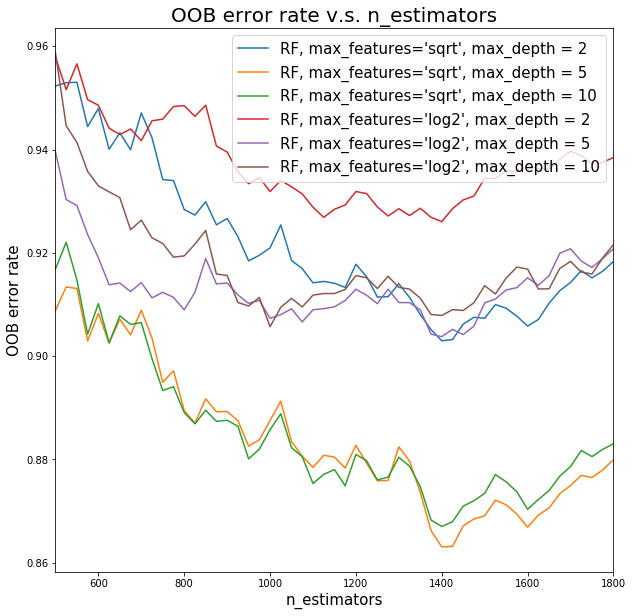

In [24]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.rcParams["figure.figsize"] = [20, 20]
plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators", fontsize = 15)
plt.ylabel("OOB error rate", fontsize = 15)
plt.legend(loc="upper right", fontsize = 15)
plt.title("OOB error rate v.s. n_estimators", fontsize = 20)
plt.show()

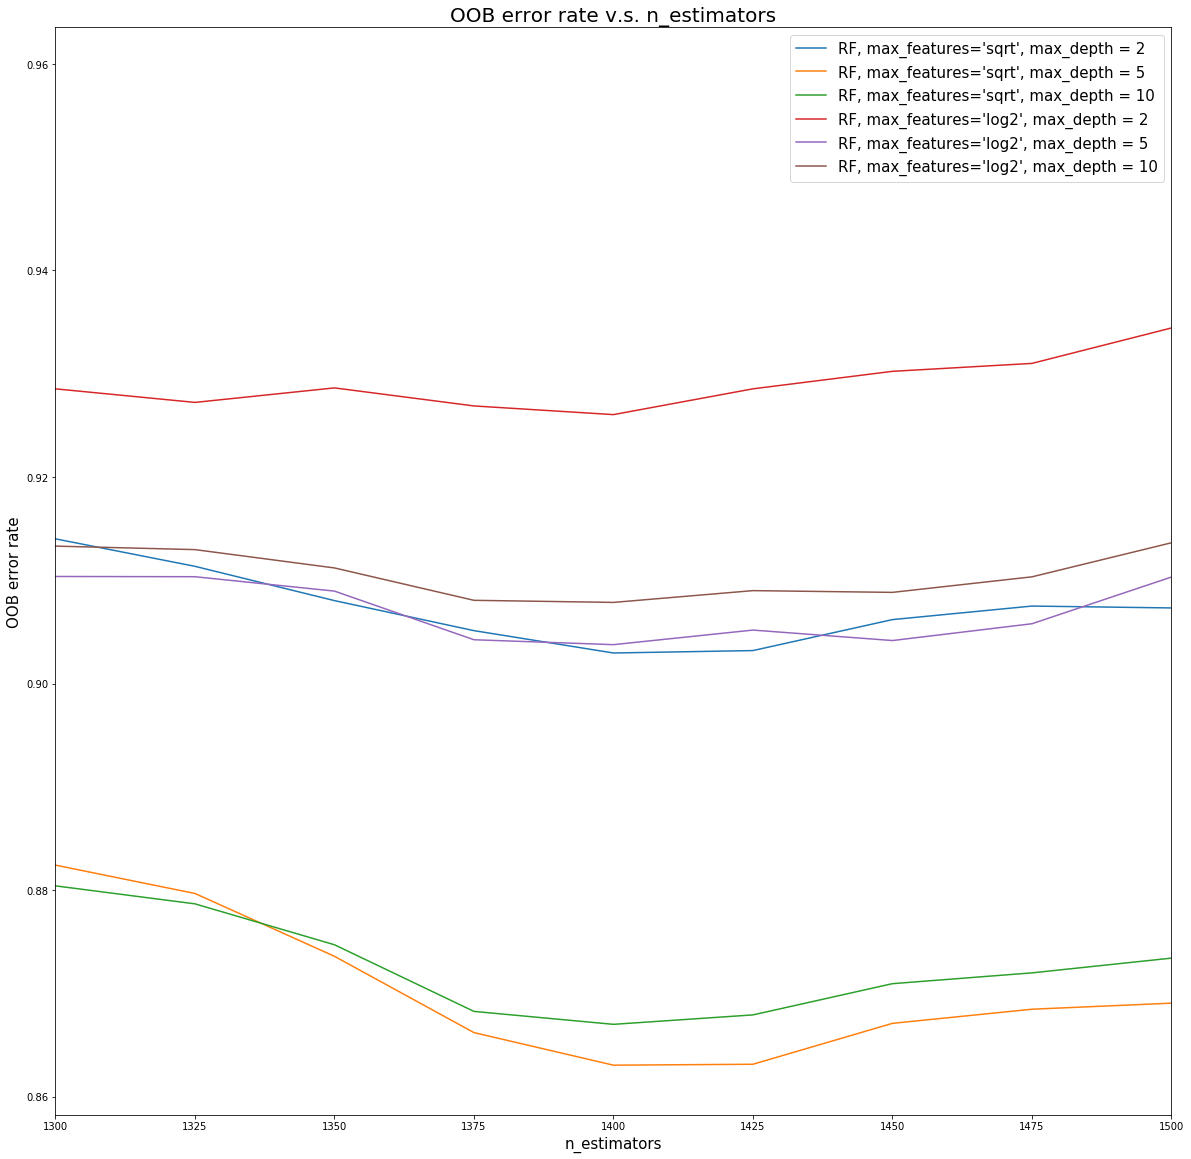

In [25]:
# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label)
plt.rcParams["figure.figsize"] = [20, 20]
plt.xlim(1300, 1500)
plt.xlabel("n_estimators", fontsize = 15)
plt.ylabel("OOB error rate", fontsize = 15)
plt.legend(loc="upper right", fontsize = 15)
plt.title("OOB error rate v.s. n_estimators", fontsize = 20)
plt.show()

**From the plot above, we can see that the blue line at 1100 estimators is the best**

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
import random
import math
seed = 42
X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2
kf = KFold(n_splits=5)

In [27]:
# Max_depth = 5, max_features = "sqrt"
RF_1 = RandomForestRegressor(random_state=seed, max_depth=5, n_estimators= 1400, 
                            oob_score=True, max_features = "sqrt")
result_negMSE_1 = cross_val_score(RF_1, X, y, cv = kf, scoring="neg_mean_absolute_error")
print("Avg kfold neg MSE: {}".format(result_negMSE_1.mean())) #Print average accuracy
output = cross_validate(RF_1, X, y, cv=kf, scoring = 'neg_mean_absolute_error', return_estimator =True)

Avg kfold neg MSE: -0.09023482855555562


### Calculate the feature importance per fold

In [28]:
# Get feature importance per estimator
feature_result = []
for idx, estimator in enumerate(output['estimator']):
    print("Features sorted by their score for estimator {}:".format(idx))
    feature_importances = pd.DataFrame(estimator.feature_importances_, index = X.columns, 
                                       columns=['importance']).sort_values('importance', ascending=False)
    feature_result.append((feature_importances)) # Save the result in each loop to feature_result
    #print(feature_importances)


Features sorted by their score for estimator 0:
Features sorted by their score for estimator 1:
Features sorted by their score for estimator 2:
Features sorted by their score for estimator 3:
Features sorted by their score for estimator 4:


In [29]:
type(feature_result)

list

In [30]:
feature_result_1 = pd.DataFrame(feature_result[0])
feature_result_2 = pd.DataFrame(feature_result[1])
feature_result_3 = pd.DataFrame(feature_result[2])
feature_result_4 = pd.DataFrame(feature_result[3])
feature_result_5 = pd.DataFrame(feature_result[4])
feature_result_all = pd.concat([feature_result_1, feature_result_2, feature_result_3, 
                              feature_result_4, feature_result_5])

In [31]:
feature_result_all

,importance
Faecalibacterium.prausnitzii._uncultured.Faecalibacterium.sp._Faecalibacterium.prausnitzii_,0.049278
Blautia.sp.._Blautia.sp..CAG.52_uncultured.Blautia.sp._,0.047606
Ruminococcus.species.incertae.sedis,0.045652
Shannon,0.033561
Dehalococcoidales.species.incertae.sedis,0.028063
...,...
Clostridiaceae.species.incertae.sedis,0.000000
Anaeromassilibacillus.species.incertae.sedis,0.000000
Clostridium.sp..CAG.230,0.000000
Clostridium.sp..CAG.288,0.000000


In [32]:
# Turn rownames to colum
feature_result_all.index.name = 'Feature'
feature_result_all.reset_index(inplace=True)
feature_result_all.head(10)


,Feature,importance
0,Faecalibacterium.prausnitzii._uncultured.Faeca...,0.049278
1,Blautia.sp.._Blautia.sp..CAG.52_uncultured.Bla...,0.047606
2,Ruminococcus.species.incertae.sedis,0.045652
3,Shannon,0.033561
4,Dehalococcoidales.species.incertae.sedis,0.028063
5,Lactobacillus.acidophilus,0.024446
6,Prevotella.sp..CAG.520,0.024351
7,Bifidobacterium.animalis,0.022364
8,Butyricicoccus.sp..BB10,0.020352
9,Romboutsia.timonensis,0.018615


In [33]:
# Select only the top 10 important features for plotting
feature_result_all.sort_values(by = "importance", ascending=False, inplace=True)

# Group features and compute the median of each group 
#https://www.kite.com/python/answers/how-to-group-a-pandas-dataframe-by-a-column-and-compute-the-mean-of-each-group-in-python
grouped_feature_result_all = feature_result_all.groupby("Feature")
mean_feature = grouped_feature_result_all.median()
mean_feature = mean_feature.reset_index() #reset index to match format

# Sort by importance
mean_feature.sort_values(by = "importance", ascending=False, inplace=True)
mean_feature.head(10)

,Feature,importance
135,Faecalibacterium.prausnitzii._uncultured.Faeca...,0.044015
210,Shannon,0.041735
52,Blautia.sp.._Blautia.sp..CAG.52_uncultured.Bla...,0.038049
203,Ruminococcus.sp..CAG.254,0.026102
181,Prevotella.sp..CAG.520,0.024351
109,Dehalococcoidales.species.incertae.sedis,0.020675
158,Lactobacillus.acidophilus,0.020238
44,Bifidobacterium.animalis,0.019721
226,X_Eubacterium_.eligens._Eubacterium.eligens.CA...,0.019046
207,Ruminococcus.species.incertae.sedis,0.018976


In [44]:
mean_feature.loc[203, ][0]

'Ruminococcus.sp..CAG.254'

In [45]:
feature_plotting = feature_result_all.loc[feature_result_all['Feature'].isin
                                          ([mean_feature.loc[135, ][0], mean_feature.loc[210, ][0],
                                           mean_feature.loc[52, ][0], mean_feature.loc[203, ][0],
                                           mean_feature.loc[181, ][0], mean_feature.loc[109, ][0],
                                           mean_feature.loc[158, ][0], mean_feature.loc[44, ][0],
                                           mean_feature.loc[226, ][0], mean_feature.loc[207, ][0]])]
feature_plotting.head()

,Feature,importance
0,Faecalibacterium.prausnitzii._uncultured.Faeca...,0.049278
1,Blautia.sp.._Blautia.sp..CAG.52_uncultured.Bla...,0.047606
2,Ruminococcus.species.incertae.sedis,0.045652
944,Faecalibacterium.prausnitzii._uncultured.Faeca...,0.045620
945,Blautia.sp.._Blautia.sp..CAG.52_uncultured.Bla...,0.045390


In [46]:
# Manually sort the plotting order
order_list = [mean_feature.loc[135, ][0], mean_feature.loc[210, ][0],
                                           mean_feature.loc[52, ][0], mean_feature.loc[203, ][0],
                                           mean_feature.loc[181, ][0], mean_feature.loc[109, ][0],
                                           mean_feature.loc[158, ][0], mean_feature.loc[44, ][0],
                                           mean_feature.loc[226, ][0], mean_feature.loc[207, ][0]]

In [56]:
order_list

['Faecalibacterium.prausnitzii._uncultured.Faecalibacterium.sp._Faecalibacterium.prausnitzii_',
 'Shannon',
 'Blautia.sp.._Blautia.sp..CAG.52_uncultured.Blautia.sp._',
 'Ruminococcus.sp..CAG.254',
 'Prevotella.sp..CAG.520',
 'Dehalococcoidales.species.incertae.sedis',
 'Lactobacillus.acidophilus',
 'Bifidobacterium.animalis',
 'X_Eubacterium_.eligens._Eubacterium.eligens.CAG.72_Candidatus.Gastranaerophilales.bacterium.HUM_19__Eubacterium_.eligens_',
 'Ruminococcus.species.incertae.sedis']

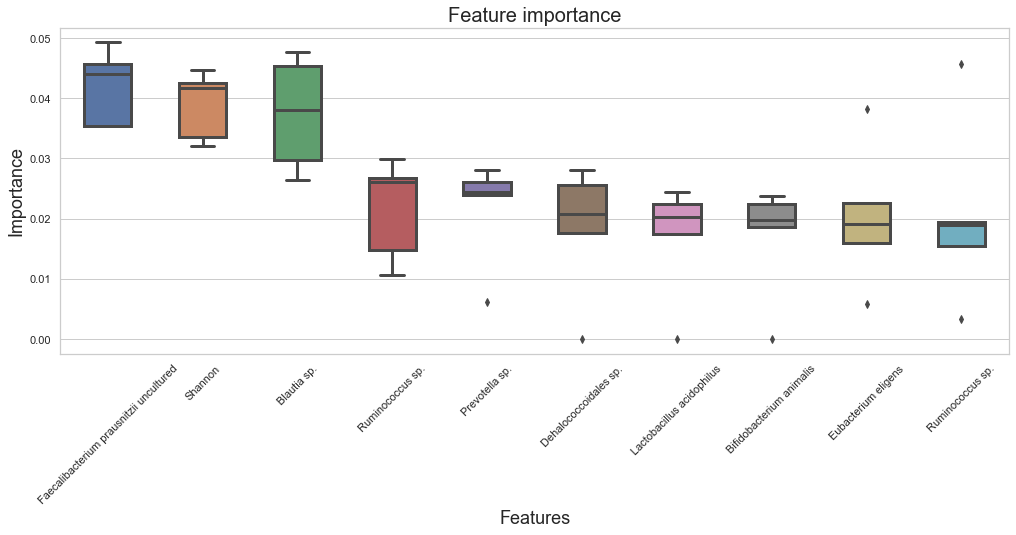

In [54]:
# Plot boxplot to see the variation of feature importance across folds 
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(17,6)})
sns.set_style("whitegrid")
a = sns.boxplot(x=feature_plotting["Feature"], y=feature_plotting["importance"], 
                width=0.5, linewidth=3, order = order_list)
a.axes.set_title("Feature importance",fontsize=20)
a.set_xlabel("Features",fontsize=18)
a.set_ylabel("Importance",fontsize=18)
a.set_xticklabels(a.get_xticklabels(),rotation = 45)
a.set_xticklabels(["Faecalibacterium prausnitzii uncultured", "Shannon",
                                           "Blautia sp.", "Ruminococcus sp.", "Prevotella sp.",
                                           "Dehalococcoidales sp.", "Lactobacillus acidophilus",
                                           "Bifidobacterium animalis", "Eubacterium eligens", 
                   "Ruminococcus sp."])
plt.show()


## Step 4: Try out linear regression (within the 5 - Fold CV setup)

In [55]:
#Scaling needs to be done per fold
#Sklearn has quite useful package called pipeline where you can run scaling and classifier per fold
from sklearn.model_selection import LeaveOneOut
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore") #Suppress warnings
seed = 42

X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2
raw_scaler = StandardScaler()
raw_scaler.fit(X)
X_scaled = raw_scaler.transform(X)

## Codes below are from https://www.kaggle.com/jnikhilsai/cross-validation-with-linear-regression

In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import LeaveOneOut
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = seed)

# Find the best hyperparameters first
# specify range of hyperparameters
hyper_params = [{'n_features_to_select': list(range(1, 60))}]

# specify model
lm = LinearRegression()
lm.fit(X_scaled, y)
rfe = RFE(lm)             

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = rfe, 
                        param_grid = hyper_params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_scaled, y)                  

Fitting 5 folds for each of 59 candidates, totalling 295 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RFE(estimator=LinearRegression()),
             param_grid=[{'n_features_to_select': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                   10, 11, 12, 13, 14, 15, 16,
                                                   17, 18, 19, 20, 21, 22, 23,
                                                   24, 25, 26, 27, 28, 29, 30, ...]}],
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [41]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.094384,0.028976,0.001103,0.000754,1,{'n_features_to_select': 1},-0.222413,-0.181066,-0.156227,-0.228963,...,-0.198193,0.026850,56,-0.072837,-0.126448,-0.140433,-0.091806,-0.095725,-0.105450,0.024532
1,0.093807,0.009184,0.000930,0.000459,2,{'n_features_to_select': 2},-0.256977,-0.138455,-0.230488,-0.206719,...,-0.207289,0.039389,59,-0.037182,-0.104790,-0.049217,-0.060886,-0.067731,-0.063961,0.022914
2,0.075195,0.023132,0.001004,0.001064,3,{'n_features_to_select': 3},-0.256977,-0.110175,-0.215108,-0.198497,...,-0.195703,0.047871,54,-0.037182,-0.087885,-0.035092,-0.056090,-0.047625,-0.052775,0.019111
3,0.075710,0.026612,0.000659,0.000232,4,{'n_features_to_select': 4},-0.253977,-0.125869,-0.212115,-0.198497,...,-0.198058,0.041326,55,-0.026997,-0.066648,-0.023270,-0.056090,-0.047112,-0.044023,0.016659
4,0.059292,0.006568,0.000541,0.000152,5,{'n_features_to_select': 5},-0.226644,-0.113064,-0.214222,-0.236780,...,-0.206419,0.047602,58,-0.021324,-0.046978,-0.018265,-0.048103,-0.028370,-0.032608,0.012630


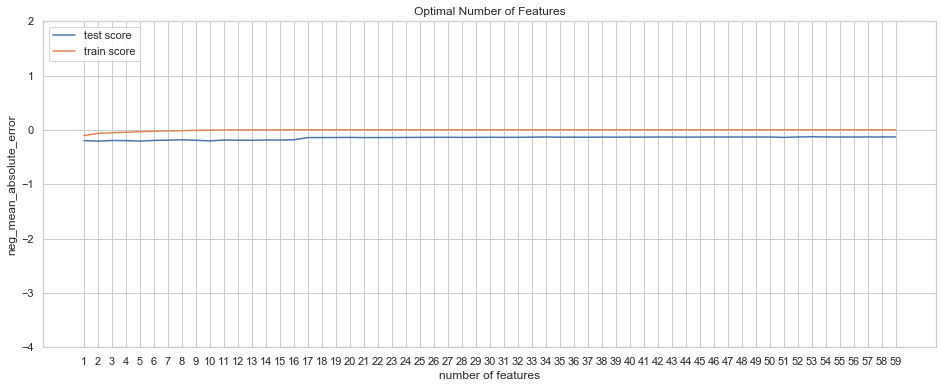

In [42]:
# plotting cv results
plt.figure(figsize=(16,6))

plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_test_score"])
plt.plot(cv_results["param_n_features_to_select"], cv_results["mean_train_score"])
plt.xticks(list(range(1,60)),[str(i) for i in range(1,60)])
plt.ylim(-4, 2)
plt.xlabel('number of features')
plt.ylabel('neg_mean_absolute_error')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper left')

In [43]:
# Who has the highest mean_test_score (negative mean squared error here)?
cv_results.sort_values('mean_test_score', ascending=False).head(5)
# The optimal n features = 53!

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_features_to_select,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
52,0.024485,0.000848,0.000481,0.000005,53,{'n_features_to_select': 53},-0.175013,-0.060881,-0.071854,-0.185576,...,-0.127056,0.051716,1,-2.101494e-16,-2.339399e-16,-2.141144e-16,-1.369275e-16,-1.036208e-16,-1.797504e-16,5.034083e-17
58,0.021410,0.000586,0.000499,0.000038,59,{'n_features_to_select': 59},-0.189397,-0.062673,-0.072001,-0.186319,...,-0.130623,0.054326,2,-1.546382e-16,-1.546382e-16,-1.149874e-16,-1.776357e-16,-1.184238e-16,-1.440647e-16,2.388956e-17
53,0.034067,0.007000,0.000534,0.000034,54,{'n_features_to_select': 54},-0.191392,-0.061648,-0.071769,-0.186121,...,-0.130706,0.055023,3,-2.894510e-16,-1.704985e-16,-1.784287e-16,-1.887379e-16,-1.406282e-16,-1.935489e-16,5.055867e-17
56,0.028677,0.008402,0.000792,0.000478,57,{'n_features_to_select': 57},-0.189084,-0.062247,-0.072457,-0.186700,...,-0.130794,0.054380,4,-2.061843e-16,-2.775558e-16,-2.934161e-16,-1.480297e-16,-1.369275e-16,-2.124227e-16,6.432284e-17
57,0.035592,0.012067,0.000684,0.000327,58,{'n_features_to_select': 58},-0.190126,-0.063236,-0.072812,-0.187245,...,-0.130807,0.054276,5,-1.110223e-16,-3.647876e-16,-2.061843e-16,-9.992007e-17,-1.221245e-16,-1.808077e-16,9.934695e-17


In [44]:
#Now we can choose the optimal value of number of features and build a final model.
n_features_optimal = 53
X, y = my_data.drop(columns=['ID','Dist_V1V2']), my_data.Dist_V1V2

lm = LinearRegression()
lm.fit(X_scaled, y)

rfe = RFE(lm, n_features_to_select=n_features_optimal)             
rfe = rfe.fit(X_scaled, y)

In [45]:
# Summarize all features
rf_df = pd.DataFrame(rfe.support_, index=X.columns, columns=['Selected_or_not'])
# Select only the "True" (selected) ones
rf_df_t = rf_df[rf_df['Selected_or_not'] == True]
rf_df_t = rf_df_t.assign(Coefficient = rfe.estimator_.coef_) 
rf_df_t

,Selected_or_not,Coefficient
Shannon,True,-0.013153
Acetobacter,True,0.004409
Acidiphilium,True,-0.010675
Adlercreutzia,True,0.005926
Akkermansia,True,-0.004929
Alistipes,True,0.005573
Anaerostipes,True,-0.008793
Azospirillum,True,0.004409
Bacteria.gen..incertae.sedis,True,0.004239
Bacteroidales.gen.._Coprobacter_Gabonia_,True,0.011191


Text(0.5, 0, 'Coefficient')

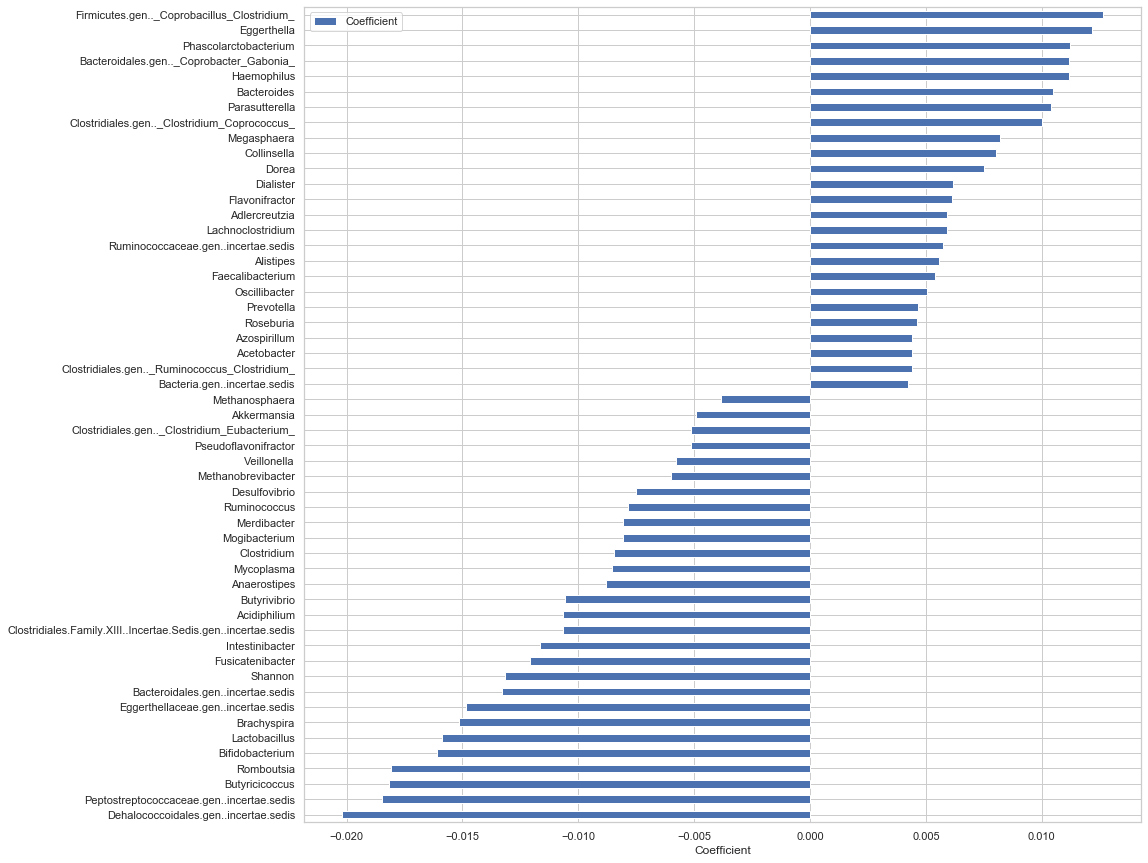

In [46]:
# Plot the coefficients
plt.rcParams['figure.figsize'] = [15, 15]
rf_df_t.sort_values('Coefficient').plot(kind='barh')
plt.xlabel("Coefficient")